# Decompositions (Matrix Factorizations)

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, SparsePCA, NMF
from sklearn.metrics import explained_variance_score
from IPython.core.display import display, HTML

Imagine the following bike counters, where everybody is biking to work, from different start places:

<pre>
>-----A----B-
             \
             D----->WORK
            /
>--------C--
</pre>

In [2]:
plt.rcParams["font.size"] = 14

In [3]:
df = pd.DataFrame()
df["A"] = np.random.randint(50,100,size=40)
df["B"] = df["A"] + np.random.randint(10,30,size=40)
df["C"] = np.random.randint(100, 200,size=40)
df["D"] = df["B"] + df["C"] + np.random.randint(0,5,size=40)
df.head()

,A,B,C,D
0,77,90,103,194
1,71,83,127,210
2,57,85,115,200
3,90,105,118,223
4,76,100,136,239


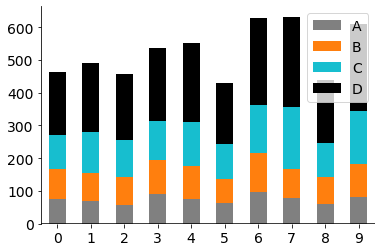

In [4]:
def stack(df):
    pos = df.copy()
    neg = df.copy()
    pos[pos < 0] = 0
    neg[neg > 0] = 0
    colors = ["0.5", "tab:orange", "tab:cyan", "black"]
    ax = pos.plot.bar(stacked=True, color=colors)
    neg.plot.bar(stacked=True, ax=ax, legend=False, color=colors)
    ax.plot(ax.get_xlim(), (0,0), "k")
    for s in ["top", "right", "bottom"]:
        ax.spines[s].set_visible(False)
    plt.xticks(rotation=0)
    return ax.get_figure()

stack(df.iloc[:10])
None

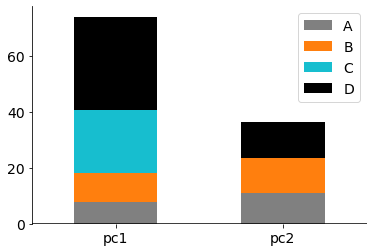


components:


,A,B,C,D
pc1,7.771856,10.251438,22.755114,33.207581
pc2,11.138766,12.498939,0.000000,12.642438



data:


,pc1,pc2
0,4.491980,3.601111
1,5.513106,2.237920
2,5.143056,2.186656
3,5.125169,4.276243
4,6.047846,2.909318



reconstructed:


,A,B,C,D
0,75.022948,91.059317,102.215521,194.694611
1,67.774728,84.488886,125.451358,211.369677
2,64.327730,80.054591,117.030819,198.433095
3,87.464145,105.988856,116.623813,224.256612
4,79.409195,98.362503,137.619420,237.615199



SCORE: 0.9751884135703468


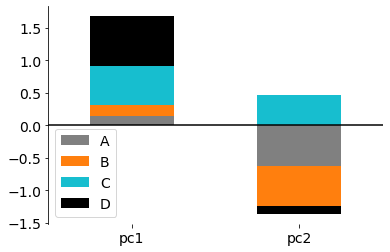


components:


,A,B,C,D
pc1,0.145802,0.158294,0.609248,0.763218
pc2,-0.631386,-0.604259,0.468794,-0.128277



data:


,pc1,pc2
0,-65.894956,-9.464461
1,-41.044394,7.752287
2,-57.712194,11.040421
3,-30.353074,-23.424492
4,-10.007829,-5.177934



mean:


,A,B,C,D
0,77.225,96.775,146.05,244.525



reconstructed:


,A,B,C,D
0,73.593086,92.063206,101.466766,195.446851
1,66.345940,85.593530,124.678021,212.204734
2,61.839652,80.968233,116.064660,199.061776
3,87.589350,106.124745,116.576200,224.363811
4,79.035110,98.319633,137.525369,237.551054



SCORE: 0.9795112007427283


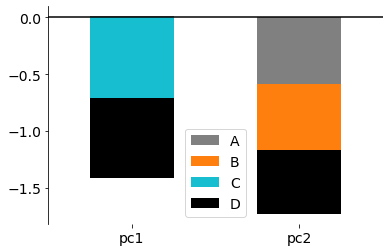


components:


,A,B,C,D
pc1,0.010658,0.000000,-0.706088,-0.708044
pc2,-0.588367,-0.578608,0.000000,-0.564834



data:


,pc1,pc2
0,62.418909,7.939687
1,29.997787,19.133641
2,42.189837,26.983925
3,41.127243,-16.145928
4,11.937303,-2.696779



mean:


,A,B,C,D
0,77.225,96.775,146.05,244.525



reconstructed:


,A,B,C,D
0,73.218803,92.181037,101.976744,195.845082
1,66.287106,85.704131,124.868916,212.477928
2,61.798198,81.161897,116.260253,199.411317
3,87.163065,106.117156,117.010538,224.524883
4,78.938923,98.335377,137.621211,237.596100



SCORE: 0.9793089572150465


In [7]:
def try_decomp(f):
    display(HTML("<h1>" + type(f).__name__ + "</h1>"))
    
    # step 1: compute the principal components
    f.fit(df)
    pc = [f"pc{i+1}" for i in range(len(f.components_))]
    components = pd.DataFrame(f.components_, columns=df.columns, index=pc)
    display(stack(components))
    print("\ncomponents:")
    display(components)
    
    # step 2: compute the compressed data
    data = f.transform(df)
    data = pd.DataFrame(data, columns=pc)
    print("\ndata:")
    display(data.head())
    
    # step 3: try to reconstruct the original data -- how close is it?
    orig_data = data.values @ f.components_
    if hasattr(f, "mean_"):
        orig_data += f.mean_
        mean = pd.DataFrame(f.mean_.reshape(1,-1), columns=df.columns)
        print("\nmean:")
        display(mean)
    orig_data = pd.DataFrame(orig_data, columns=df.columns)
    print("\nreconstructed:")
    display(orig_data.head())
    print("\nSCORE: " + str(explained_variance_score(df, orig_data)))
    plt.close()

ncomps = 2
try_decomp(NMF(ncomps))
try_decomp(PCA(ncomps))
try_decomp(SparsePCA(ncomps))